## Import Statements

In [1]:
import pandas as pd

## Data Exploration

 Reading the .csv file and store it in a Pandas dataframe

In [2]:
df=pd.read_csv('QueryResults.csv',names=['DATE', 'TAG', 'POSTS'], header=0)

 Examining the first 5 rows and the last 5 rows of the of the dataframe

In [4]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [5]:
df.tail()

,DATE,TAG,POSTS
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


Checking how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [6]:
df.shape

(1991, 3)

 Count the number of entries in each column of the dataframe

In [7]:
df.count()

DATE     1991
TAG      1991
POSTS    1991
dtype: int64

 Calculating the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [8]:
df.groupby('TAG').sum()

,POSTS
TAG,
assembly,34852
c,336042
c#,1423530
c++,684210
delphi,46212
go,47499
java,1696403
javascript,2056510
perl,65286


How many months of data exist per language? Which language had the fewest months with an entry? 


In [9]:
few_months=df.groupby('TAG').count()
few_months.sort_values('DATE')


,DATE,POSTS
TAG,,
go,129,129
swift,135,135
r,142,142
assembly,144,144
c,144,144
c++,144,144
delphi,144,144
java,144,144
javascript,144,144


## Data Cleaning
Using Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [10]:
df.DATE=pd.to_datetime(df.DATE)
df.head()


,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


## Data Manipulation



In [11]:
reshaped_df=df.pivot(index='DATE',columns='TAG',values='POSTS')
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


Knowning the dimensions of our new dataframe? How many rows and columns does it have? Printing out the column names and print out the first 5 rows of the dataframe.

In [12]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [13]:
reshaped_df.shape

(145, 14)

In [14]:
df.shape

(1991, 3)

Counting the number of entries per programming language. Why might the number of entries be different? 

In [15]:
reshaped_df.fillna(0,inplace=True)

In [16]:
reshaped_df.isna().values.any()

False

In [17]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144


## Data Visualisaton with with Matplotlib


In [18]:
import matplotlib.pyplot as plt
 


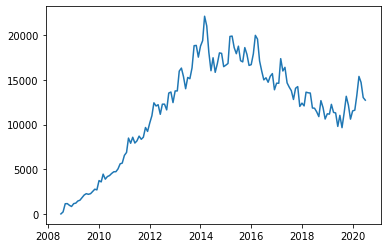

In [19]:
plt.plot(reshaped_df.index,reshaped_df.java)

Showing two line (e.g. for Java and Python) on the same chart.

Text(0, 0.5, 'languages')

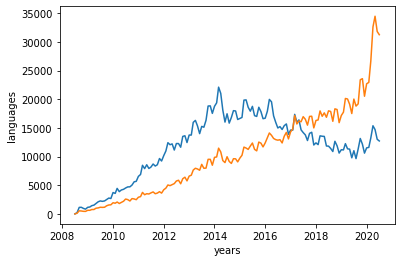

In [20]:
plt.plot(reshaped_df.index,reshaped_df.java)
plt.plot(reshaped_df.index,reshaped_df.python)
plt.xlabel('years')
plt.ylabel('languages')

# Smoothing out Time Series Data

Using .rolling() and .mean() functions

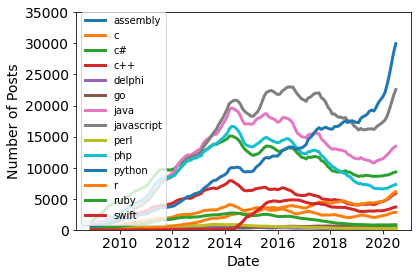

In [21]:
roll_df=reshaped_df.rolling(window=6).mean()

 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.legend()
plt.ylim(0, 35000)

for column in roll_df.columns:
  plt.plot(roll_df.index,roll_df[column],linewidth=3,label=roll_df[column].name ) 
plt.legend()
